<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/dl-handson-tcb/blob/master/L02_TrainDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Deep Neural Networks (DNN) para clasificación multi-clase*

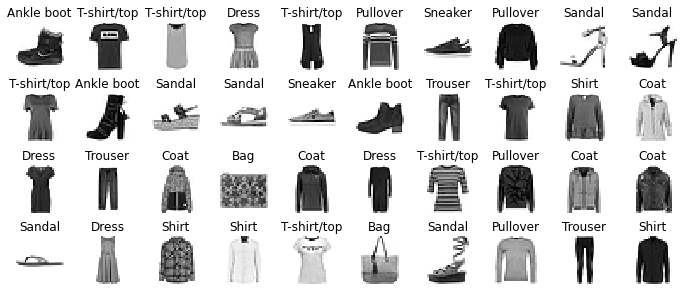

## 0. Preparación del entorno y comprobación de requisitos

In [1]:
# Common imports
import os
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def print_history(history,title=None, extension='png'):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1)
    plt.xlabel("epochs")
    if(title!=None):
        plt.title(title)
        save_fig(title,fig_extension=extension)

2024-06-09 08:24:23.696619: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-09 08:24:23.721221: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 08:24:23.721279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 08:24:23.722318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-09 08:24:23.728847: I tensorflow/core/platform/cpu_feature_guar

### Información de versiones

In [2]:
tf.__version__

'2.15.0'

### Comprobar si disponemos de una GPU

In [3]:
tf.config.list_physical_devices('GPU')

2024-06-09 08:24:32.152621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-09 08:24:32.176876: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-09 08:24:32.177816: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. Dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

**¡AHORA TÚ!**
- Repasa el notebook de la sesión anterior y averiguar si tenemos que hacer algún otro paso importante con el dataset

In [6]:
## SOLUTION
# Falta normalizar los datos. Si no se hace la red puede no converger bien
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

## 2. Entrenamiento

### Modelo 'base' de red neuronal

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


2024-06-09 08:24:53.545114: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-09 08:24:53.608781: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb5dcb6fa60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-09 08:24:53.608811: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-06-09 08:24:53.617190: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1717914293.653719   13772 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 8s 4ms/step - loss: 2.2858 - accuracy: 0.2288 - val_loss: 2.2414 - val_accuracy: 0.3872
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2153 - accuracy: 0.4346 - val_loss: 2.1889 - val_accuracy: 0.5086
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1588 - accuracy: 0.4981 - val_loss: 2.1280 - val_accuracy: 0.5082
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.0923 - accuracy: 0.5194 - val_loss: 2.0562 - val_accuracy: 0.5282
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.0131 - accuracy: 0.5385 - val_loss: 1.9705 - val_accuracy: 0.5106
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.9214 - accuracy: 0.5448 - val_loss: 1.8733 - val_accuracy: 0.5444
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.8213 - accuracy: 0.5502 - val_loss: 1.7707 - val_accuracy: 0.5880
Epo

- Observa que en cada _epoch_ se ejecuta un número de _steps_ de entrenamiento igual a 1719. ¿Sabes explicar qué les ocurre a los parámetros de la red en cada _step_ del entrenamiento?
- El número de _steps_ depende de:
 - El tamaño del _batch_ que se utilice (en Keras se utiliza 32 por defecto).
 - El número de muestras de entrenamiento. 
- Por tanto, podemos calcular el número de _steps_ de la siguiente manera:

In [10]:
import math
batch_size = 32
n_epochs = 30
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
print(n_steps_per_epoch)

1719


In [11]:
# SOLUTION
# Al final de cada step se actualizan los parámetros de la red neuronal a partir del gradiente calculado para el batch en cuestión

**¡AHORA TÚ!**
- ¿Qué tal ha ido el entrenamiento anterior con la función _sigmoid_? ¿Qué valores se alcanzan de `accuracy` y de `val_accuracy`? 
- Muestra una gráfica con la evolución del entrenamiento a lo largo de los epochs.
- ¿Cómo evolucionará el entrenamiento con más _epochs_? ¿Qué valores se alcanzan de `accuracy` y de `val_accuracy` para 20 _epochs_? 
 - A) Prueba a seguir entrenando ejecutando de nuevo la celda anterior. 
 - B) Vuelve a compilar el modelo para resetear el entrenamiento y cambia esta vez el parámetro `epoch` en la función `fit` a 20. 



In [12]:
## SOLUTION
# - Después de las primeras 10 epochs se consigue un val_accuracy de entorno al 60%, pero con otras 10 epochs llegamos a 75%. 
# Con más epochs tiende a estancarse.

Saving figure L01_FashionMnist_1layer


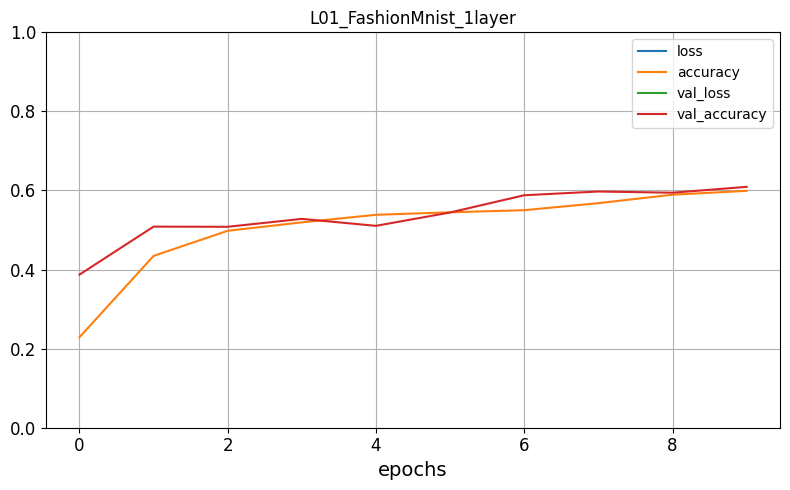

In [12]:
#SOLUTION
print_history(history,"L01_FashionMnist_1layer")
#La red está subajustando

In [13]:
# SOLUTION
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
#model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 1000us/step - loss: 2.3338 - accuracy: 0.1472 - val_loss: 2.2439 - val_accuracy: 0.3506
Epoch 2/20
1719/1719 [==============================] - 2s 942us/step - loss: 2.2299 - accuracy: 0.3975 - val_loss: 2.1838 - val_accuracy: 0.5112
Epoch 3/20
1719/1719 [==============================] - 2s 942us/step - loss: 2.1690 - accuracy: 0.5156 - val_loss: 2.1171 - val_accuracy: 0.5834
Epoch 4/20
1719/1719 [==============================] - 2s 950us/step - loss: 2.0990 - accuracy: 0.5655 - val_loss: 2.0386 - val_accuracy: 0.5832
Epoch 5/20
1719/1719 [==============================] - 2s 932us/step - loss: 2.0164 - accuracy: 0.5938 - val_loss: 1.9466 - val_accuracy: 0.6142
Epoch 6/20
1719/1719 [==============================] - 2s 949us/step - loss: 1.9226 - accuracy: 0.5913 - val_loss: 1.8447 - val_accuracy: 0.6138
Epoch 7/20
1719/1719 [==============================] - 2s 921us/step - loss: 1.8204 - accuracy: 0.6098 - val_loss: 1.7388 

In [14]:
# SOLUTION
def graph_training(history,name):
    #history.params
    #print(history.epoch)
    #history.history.keys()
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1)  --> NECESARIO COMENTAR LA LIMITACIÓN EN EL EJE Y PARA QUE SE VEA EL LOSS
    save_fig(name)
    plt.show()

Saving figure sigmoid_training


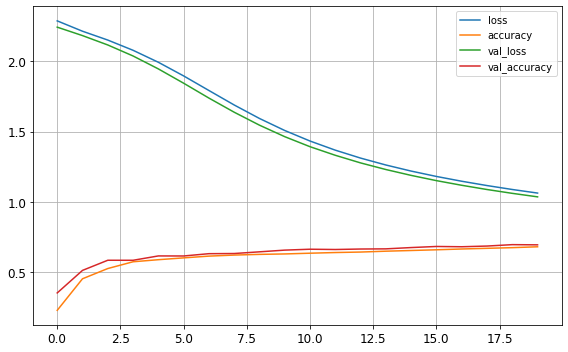

In [15]:
graph_training(history,"00.sigmoid_training")

### Funciones de activación y learning rate

- Observa, a continuación, las diferentes funciones de activación disponibles en Keras

In [16]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

**¡AHORA TÚ!**
- Prueba a entrenar la red con `tanh` y `relu` para averiguar cómo afecta a la evolución del entrenamiento.
- Compara las gráficas de entrenamiento con el modelo anterior.

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 1.5825 - accuracy: 0.5010 - val_loss: 0.8705 - val_accuracy: 0.7236
Epoch 2/20
1719/1719 [==============================] - 2s 940us/step - loss: 0.8393 - accuracy: 0.7265 - val_loss: 0.7095 - val_accuracy: 0.7640
Epoch 3/20
1719/1719 [==============================] - 2s 935us/step - loss: 0.7051 - accuracy: 0.7677 - val_loss: 0.6368 - val_accuracy: 0.7850
Epoch 4/20
1719/1719 [==============================] - 2s 950us/step - loss: 0.6407 - accuracy: 0.7884 - val_loss: 0.5902 - val_accuracy: 0.8006
Epoch 5/20
1719/1719 [==============================] - 2s 942us/step - loss: 0.6020 - accuracy: 0.7995 - val_loss: 0.5591 - val_accuracy: 0.8106
Epoch 6/20
1719/1719 [==============================] - 2s 959us/step - loss: 0.5738 - accuracy: 0.8101 - val_loss: 0.5367 - val_accuracy: 0.8150
Epoch 7/20
1719/1719 [==============================] - 2s 921us/step - loss: 0.5489 - accuracy: 0.8157 - val_loss: 0.5180 - v

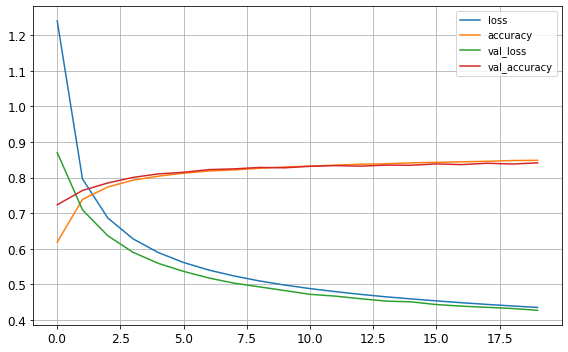

In [17]:
## SOLUTION
# - Con sigmoid aprende más despacio. 
# - Con tanh en 10 epochs llegamos a 83%. Con 20 epochs a 84%.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="tanh"))
model.add(keras.layers.Dense(100, activation="tanh"))
model.add(keras.layers.Dense(10, activation="softmax"))
#model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
graph_training(history,"01.tanh_training")

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 1.7564 - accuracy: 0.4499 - val_loss: 0.9492 - val_accuracy: 0.7122
Epoch 2/20
1719/1719 [==============================] - 2s 957us/step - loss: 0.8975 - accuracy: 0.7210 - val_loss: 0.7372 - val_accuracy: 0.7618
Epoch 3/20
1719/1719 [==============================] - 2s 969us/step - loss: 0.7325 - accuracy: 0.7680 - val_loss: 0.6499 - val_accuracy: 0.7864
Epoch 4/20
1719/1719 [==============================] - 2s 948us/step - loss: 0.6487 - accuracy: 0.7939 - val_loss: 0.5980 - val_accuracy: 0.8024
Epoch 5/20
1719/1719 [==============================] - 2s 926us/step - loss: 0.6026 - accuracy: 0.8058 - val_loss: 0.5634 - val_accuracy: 0.8128
Epoch 6/20
1719/1719 [==============================] - 2s 945us/step - loss: 0.5642 - accuracy: 0.8146 - val_loss: 0.5366 - val_accuracy: 0.8208
Epoch 7/20
1719/1719 [==============================] - 2s 937us/step - loss: 0.5442 - accuracy: 0.8222 - val_loss: 0.5186 - v

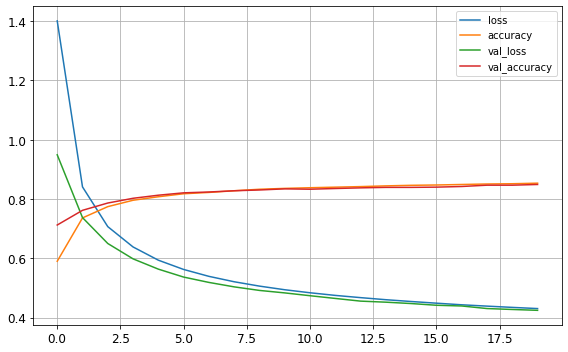

In [18]:
## SOLUTION
# Con relu en 10 epochs 82%. Con 20 epochs 84% 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
#model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
graph_training(history,"02.relu_training")

**¡AHORA TÚ!**
- Utiliza ahora `relu`como función de activación y prueba valores más pequeños y más grandes de `learning_rate` para averiguar cómo afecta a la evolución del entrenamiento (haz variaciones de un orden de magnitud para ver cambios significativos).
 - ¿Qué ocurre si usamos `learning_rate` 1e-4?
 - ¿Qué ocurre si usamos `learning_rate` 1e-2?
- En las pruebas que vas realizado, ¿hay mucha diferencia entre `loss` y `val_loss`? Si esto ocurriera, ¿qué problema nos estaríamos encontrando?
- Busca una configuración de `epochs` y `learning_rate` en la que se observe que empieza a haber _overfitting_. ¿Qué ocurre en esa situación si disminuimos el `learning_rate`.


Epoch 1/35
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0085 - accuracy: 0.6778 - val_loss: 0.4969 - val_accuracy: 0.8302
Epoch 2/35
1719/1719 [==============================] - 2s 938us/step - loss: 0.4962 - accuracy: 0.8302 - val_loss: 0.4455 - val_accuracy: 0.8400
Epoch 3/35
1719/1719 [==============================] - 2s 931us/step - loss: 0.4542 - accuracy: 0.8397 - val_loss: 0.4146 - val_accuracy: 0.8504
Epoch 4/35
1719/1719 [==============================] - 2s 942us/step - loss: 0.4120 - accuracy: 0.8567 - val_loss: 0.3927 - val_accuracy: 0.8602
Epoch 5/35
1719/1719 [==============================] - 2s 944us/step - loss: 0.3916 - accuracy: 0.8647 - val_loss: 0.3963 - val_accuracy: 0.8580
Epoch 6/35
1719/1719 [==============================] - 2s 948us/step - loss: 0.3724 - accuracy: 0.8684 - val_loss: 0.3700 - val_accuracy: 0.8704
Epoch 7/35
1719/1719 [==============================] - 2s 952us/step - loss: 0.3636 - accuracy: 0.8737 - val_loss: 0.3697 - v

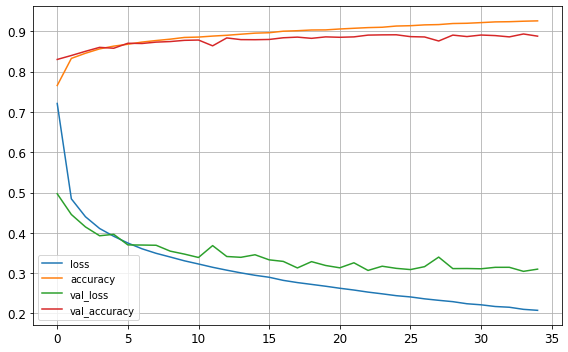

In [19]:
## SOLUTION
# - En las pruebas anteriores, en principio no llega a sobre-entrenar
# - Disminuyendo el learning rate aprende más rápido y aumentándolo más despacio
# - Con 35 epochs y 1e-2 empieza a detectarse overfitting. Si bajamos a 1e-3 y mantenemos 35 epochs ya no sobre-entrena
# y podríamos seguir más epochs
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
#model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-2),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=35,
                    validation_data=(X_valid, y_valid))
graph_training(history,"03.lr1e2")

### Utilización de _callbacks_ durante el entrenamiento

- Para obtener información extra durante el entrenamiento podemos crear _Callbacks_: funciones que se invocan al finalizar cada _epoch_.

In [20]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("(Loss)val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
val_train_ratio_cb = PrintValTrainRatioCallback()

**¡AHORA TÚ!**
- Prueba a utilizar el _callback_ anterior durante el entrenamiento.
- ¿Cuál es el valor ideal que buscamos para la relación entre `val_loss` y `loss` y qué significan valores más pequeños o más grandes?
- Escribe tu propio _callback_ para obtener información sobre la relación entre `val_accuracy` y `accuracy`.
- ¿Cuál es el valor ideal que buscamos para la relación entre `val_accuracy` y `accuracy` y qué significan valores más pequeños o más grandes?



In [21]:
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/2
1719/1719 [==============================] - 2s 995us/step - loss: 0.2039 - accuracy: 0.9279 - val_loss: 0.3085 - val_accuracy: 0.8900
(Loss)val/train: 1.51
Epoch 2/2
1719/1719 [==============================] - 2s 948us/step - loss: 0.2017 - accuracy: 0.9287 - val_loss: 0.3103 - val_accuracy: 0.8898
(Loss)val/train: 1.54


In [22]:
# SOLUTION
# - Idealmente val_loss/loss tiene que ir decreciendo hasta 1.0 (se acerca desde arriba)
# - Si el valor crece, significa que está empezando a haber overfitting
# - Será raro que sea <1 porque significaría que se comete más error con
# el set de entrenamiento underfitting

In [23]:
# SOLUTION
class PrintValTrainAccuracyRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("(Accuracy)val/train: {:.2f}".format(logs["val_accuracy"] / logs["accuracy"]))
val_acc_train_ratio_cb = PrintValTrainAccuracyRatioCallback()

In [24]:
# SOLUTION
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_acc_train_ratio_cb])

Epoch 1/5
1719/1719 [==============================] - 2s 974us/step - loss: 0.1972 - accuracy: 0.9307 - val_loss: 0.3073 - val_accuracy: 0.8940
(Accuracy)val/train: 0.96
Epoch 2/5
1719/1719 [==============================] - 2s 926us/step - loss: 0.1951 - accuracy: 0.9306 - val_loss: 0.3094 - val_accuracy: 0.8890
(Accuracy)val/train: 0.96
Epoch 3/5
1719/1719 [==============================] - 2s 918us/step - loss: 0.1925 - accuracy: 0.9313 - val_loss: 0.3283 - val_accuracy: 0.8874
(Accuracy)val/train: 0.95
Epoch 4/5
1719/1719 [==============================] - 2s 949us/step - loss: 0.1893 - accuracy: 0.9334 - val_loss: 0.3246 - val_accuracy: 0.8898
(Accuracy)val/train: 0.95
Epoch 5/5
1719/1719 [==============================] - 2s 954us/step - loss: 0.1855 - accuracy: 0.9336 - val_loss: 0.3125 - val_accuracy: 0.8918
(Accuracy)val/train: 0.96


In [25]:
# SOLUTION
# - Accuracy es opuesto a loss
# - Idealmente val_accuracy/accuracy tiene que ir creciendo hasta 1.0 (se acerca desde abajo)
# - Si el valor decrece, significa que está empezando a haber overfitting
# - Será raro que sea >1 porque significaría que se comete más error con
# el set de entrenamiento underfitting

###  Inicialización de pesos y variaciones de funciones de activación tipo ReLU

-  También es posible definir las funciones de activación como capas de la red. Observa cuáles son las capas que ofrecen variaciones de funciones de activación tipo `ReLU`.

In [26]:
[m for m in dir(keras.layers) if "elu" in m.lower()]

['ELU', 'LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

**¡AHORA TÚ!**
- También es posible cambiar la inicialización de los pesos de la red, por ejemplo: `he_normal`.
- Prueba a utilizar como plantilla la red definida a continuación y utiliza como función de activación alguna variación de ReLU para entrenar durante 30 _epochs_.
- Probablemente, para este caso en particular no se observen cambios importantes respecto a entrenar con la función ReLU.

<code> model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.<<TODO>>(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.<<TODO>>(),
    keras.layers.Dense(10, activation="softmax")
    ])
</code>

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 1.4321 - accuracy: 0.5373 - val_loss: 0.7625 - val_accuracy: 0.7504
Epoch 2/30
1719/1719 [==============================] - 2s 945us/step - loss: 0.7350 - accuracy: 0.7625 - val_loss: 0.6410 - val_accuracy: 0.7852
Epoch 3/30
1719/1719 [==============================] - 2s 940us/step - loss: 0.6336 - accuracy: 0.7909 - val_loss: 0.5808 - val_accuracy: 0.8038
Epoch 4/30
1719/1719 [==============================] - 2s 942us/step - loss: 0.5781 - accuracy: 0.8087 - val_loss: 0.5474 - val_accuracy: 0.8074
Epoch 5/30
1719/1719 [==============================] - 2s 950us/step - loss: 0.5537 - accuracy: 0.8154 - val_loss: 0.5209 - val_accuracy: 0.8180
Epoch 6/30
1719/1719 [==============================] - 2s 951us/step - loss: 0.5227 - accuracy: 0.8228 - val_loss: 0.5037 - val_accuracy: 0.8256
Epoch 7/30
1719/1719 [==============================] - 2s 949us/step - loss: 0.5094 - accuracy: 0.8270 - val_loss: 0.4906 - v

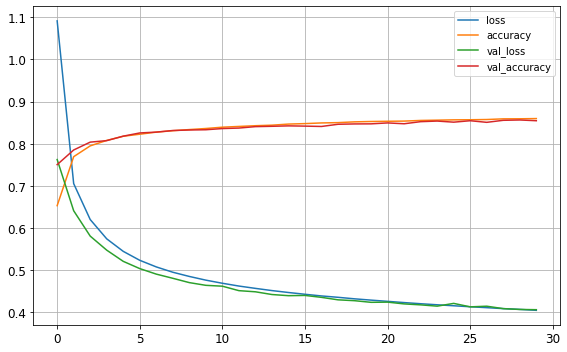

In [27]:
## SOLUTION
# No se observan cambios importantes. 
# Esta es la que más sentido tiene probar con inicialización he_normal
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ELU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ELU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
graph_training(history,"04.he_elu")

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 1.6352 - accuracy: 0.5029 - val_loss: 0.8810 - val_accuracy: 0.7198
Epoch 2/30
1719/1719 [==============================] - 2s 964us/step - loss: 0.8354 - accuracy: 0.7261 - val_loss: 0.7088 - val_accuracy: 0.7626
Epoch 3/30
1719/1719 [==============================] - 2s 947us/step - loss: 0.6961 - accuracy: 0.7694 - val_loss: 0.6324 - val_accuracy: 0.7862
Epoch 4/30
1719/1719 [==============================] - 2s 952us/step - loss: 0.6284 - accuracy: 0.7932 - val_loss: 0.5889 - val_accuracy: 0.8022
Epoch 5/30
1719/1719 [==============================] - 2s 957us/step - loss: 0.5895 - accuracy: 0.8037 - val_loss: 0.5598 - val_accuracy: 0.8138
Epoch 6/30
1719/1719 [==============================] - 2s 952us/step - loss: 0.5655 - accuracy: 0.8139 - val_loss: 0.5402 - val_accuracy: 0.8200
Epoch 7/30
1719/1719 [==============================] - 2s 961us/step - loss: 0.5363 - accuracy: 0.8205 - val_loss: 0.5188 - v

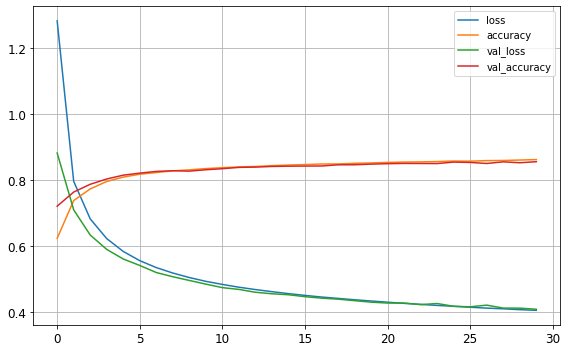

In [28]:
# SOLUTION
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
graph_training(history,"05.he_leakyReLU")

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2052 - accuracy: 0.1547 - val_loss: 1.9013 - val_accuracy: 0.3054
Epoch 2/30
1719/1719 [==============================] - 2s 968us/step - loss: 1.7798 - accuracy: 0.3917 - val_loss: 1.3750 - val_accuracy: 0.5942
Epoch 3/30
1719/1719 [==============================] - 2s 955us/step - loss: 1.3008 - accuracy: 0.5986 - val_loss: 1.0554 - val_accuracy: 0.6592
Epoch 4/30
1719/1719 [==============================] - 2s 941us/step - loss: 1.0300 - accuracy: 0.6560 - val_loss: 0.8821 - val_accuracy: 0.6864
Epoch 5/30
1719/1719 [==============================] - 2s 953us/step - loss: 0.8727 - accuracy: 0.6818 - val_loss: 0.7958 - val_accuracy: 0.7084
Epoch 6/30
1719/1719 [==============================] - 2s 972us/step - loss: 0.7974 - accuracy: 0.7027 - val_loss: 0.7435 - val_accuracy: 0.7266
Epoch 7/30
1719/1719 [==============================] - 2s 953us/step - loss: 0.7372 - accuracy: 0.7300 - val_loss: 0.7001 - v

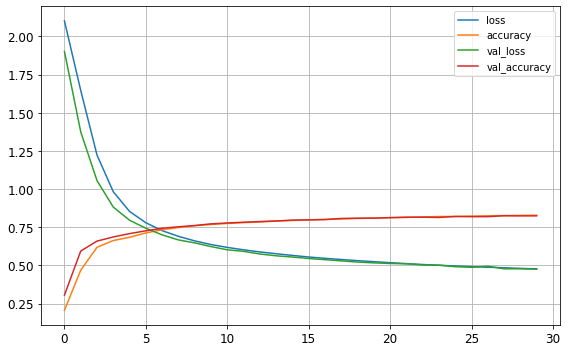

In [29]:
## SOLUTION
# LeakyReLU: No se observan cambios importantes respecto ReLU
# ELU: No se observan cambios importantes respecto a LeakyReLU
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ThresholdedReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ThresholdedReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
graph_training(history,"06.he_thresholdedReLU")

### Batch normalization

En las clases de teoría vimos cómo la técnica de _Batch Normalization_ consigue entrenamientos más estables. Las ventajas son las siguientes:
- Reduce el problema de desvanecimiento de gradiente.
- Permite usar tasas de aprendizaje mayores.
- Permite una convergencia de la red más rápida.
- Actúa como técnica de regularización.

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

- ¿En qué se basa el funcionamiento de _Batch Normalization_? Observa que al utilizar capas `BatchNormalization` ya no es necesario que las capas intermedias de la red tengan un término de bias, por lo que no lo incluimos en la definición de nuestra red.
- ¿Cómo se explica que el número de parámetros pase de 784 a 3136 en la segunda capa? ¿Cómo se calcula el número de parámetros de las capas _batch_normalization_3_, _batch_normalization_4_ y _batch_normalization_5_?

In [31]:
## PRIVATE
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

**¡AHORA TÚ!**
- ¿Cómo evoluciona comparativamente el entrenamiento respecto a lo que obteníamos cuando no usábamos _Batch Normalization_?

Epoch 1/15
1719/1719 [==============================] - 3s 2ms/step - loss: 1.4389 - accuracy: 0.5212 - val_loss: 0.7107 - val_accuracy: 0.7684
(Loss)val/train: 0.66
Epoch 2/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7324 - accuracy: 0.7665 - val_loss: 0.5882 - val_accuracy: 0.7968
(Loss)val/train: 0.83
Epoch 3/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6306 - accuracy: 0.7936 - val_loss: 0.5278 - val_accuracy: 0.8148
(Loss)val/train: 0.85
Epoch 4/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5741 - accuracy: 0.8072 - val_loss: 0.4931 - val_accuracy: 0.8272
(Loss)val/train: 0.87
Epoch 5/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5454 - accuracy: 0.8145 - val_loss: 0.4678 - val_accuracy: 0.8342
(Loss)val/train: 0.87
Epoch 6/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5188 - accuracy: 0.8233 - val_loss: 0.4497 - val_accuracy: 0.8378
(Loss)val/train: 0.88
Epoc

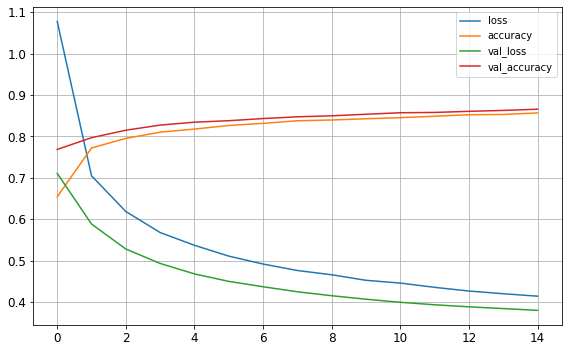

In [32]:
#SOLUTION
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid),
                    callbacks = [val_train_ratio_cb])
graph_training(history,"07.batchnormalization")

Saving figure batchnormalization


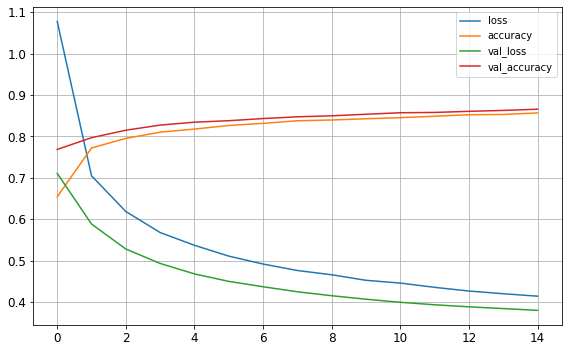

In [33]:
graph_training(history,"07.batchnormalization")

### Optimizadores

- Hasta ahora solamente hemos utilizado SGD como optimizador. 
- Observa algunas otras opciones disponibles en Keras.

`optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)`

**¡AHORA TÚ!**
- Utilizando la última red que hayas creado, prueba un par de optimizadores (Por ejemplo _RMSProp_ y _AdaMax_) y compara la evolución del entrenamiento a lo largo de unas 15 ó 20 `epochs`, respecto a lo que ocurría con SGD. Utiliza un callback en la función `fit` que te permita responder mejor después a la siguiente pregunta.
- ¿Cuál es el optimizador con el que has conseguido mejor `accuracy` con el set de entrenamiento? ¿Cómo son `val_accuracy` y `val_loss`? ¿Se ha producido _overfitting_ y si es así en torno a qué número de `epoch`?

In [34]:
# SOLUTION
# - SGD con momentum. Funcionamiento equivalente val_accuracy: 87%. REPETIR PRUEBA
#optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# - SGD nesterov. Funcionamiento equivalente 87%. REPETIR PRUEBA
#optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# RMSProp - MEJORA, pero empieza a sobre-entrenar más rápidamente
# optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
# En epoch 15: loss: 0.2508 - accuracy: 0.9090 - val_loss: 0.3574 - val_accuracy: 0.8896

# - Adagrad ligeramente mejor: 88%. REPETIR PRUEBA
#optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
# - Ligeramente mejor, empieza a sobre-entrenar con 10 epochs: 88%
# optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# - ADAM: Sobre-entrena rápidamente. En epoch 15: loss: 0.1438 - accuracy: 0.9463 - val_loss: 0.4398 - val_accuracy: 0.8902
#optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# - ADAM: Bajando learning-rate no conseguimos mucho. En epoch 15: loss: 0.1768 - accuracy: 0.9348 - val_loss: 0.3014 - val_accuracy: 0.8936
#optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
# - ADAM: Sin parámetros. Mejora un poco: loss: 0.1682 - accuracy: 0.9366 - val_loss: 0.3174 - val_accuracy: 0.9002
#optimizer = keras.optimizers.Adam()

#- ADAMAX: MEJOR ACCURACY, pero empieza a sobre-entrenar muy rápidamente
# Epoch 1:  loss: 0.1237 - accuracy: 0.9539 - val_loss: 0.3048 - val_accuracy: 0.9018
# Epoch 15: loss: 0.0593 - accuracy: 0.9791 - val_loss: 0.3874 - val_accuracy: 0.9014
#optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#- NADAM: PARECIDO AL ANTERIOR, PERO CON val_loss MÁS ALTO
# Epoch 1:  loss: 0.0614 - accuracy: 0.9777 - val_loss: 0.3944 - val_accuracy: 0.9006
# Epoch 15: loss: 0.0391 - accuracy: 0.9862 - val_loss: 0.4641 - val_accuracy: 0.9004
#optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


Epoch 1/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9296 - accuracy: 0.6881 - val_loss: 0.4969 - val_accuracy: 0.8260
(Loss)val/train: 0.74
Epoch 2/15
1719/1719 [==============================] - 2s 948us/step - loss: 0.4835 - accuracy: 0.8324 - val_loss: 0.4581 - val_accuracy: 0.8370
(Loss)val/train: 0.97
Epoch 3/15
1719/1719 [==============================] - 2s 958us/step - loss: 0.4416 - accuracy: 0.8461 - val_loss: 0.4220 - val_accuracy: 0.8528
(Loss)val/train: 0.97
Epoch 4/15
1719/1719 [==============================] - 2s 990us/step - loss: 0.4138 - accuracy: 0.8572 - val_loss: 0.3982 - val_accuracy: 0.8592
(Loss)val/train: 0.96
Epoch 5/15
1719/1719 [==============================] - 2s 964us/step - loss: 0.3989 - accuracy: 0.8603 - val_loss: 0.3911 - val_accuracy: 0.8592
(Loss)val/train: 0.99
Epoch 6/15
1719/1719 [==============================] - 2s 958us/step - loss: 0.3929 - accuracy: 0.8637 - val_loss: 0.4010 - val_accuracy: 0.8600
(Loss)val/train:

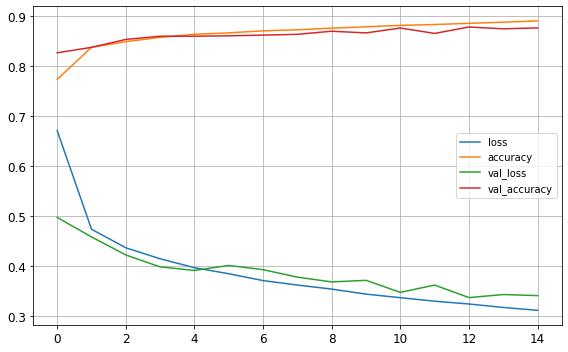

In [35]:
# SOLUTION
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid),
                    callbacks = [val_train_ratio_cb])
#model.summary()
graph_training(history,"08.nesterov")

Epoch 1/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6495 - accuracy: 0.7688 - val_loss: 0.4427 - val_accuracy: 0.8332
(Loss)val/train: 0.86
Epoch 2/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4031 - accuracy: 0.8539 - val_loss: 0.4277 - val_accuracy: 0.8436
(Loss)val/train: 1.08
Epoch 3/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3611 - accuracy: 0.8688 - val_loss: 0.4102 - val_accuracy: 0.8552
(Loss)val/train: 1.14
Epoch 4/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3380 - accuracy: 0.8797 - val_loss: 0.3754 - val_accuracy: 0.8720
(Loss)val/train: 1.10
Epoch 5/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3268 - accuracy: 0.8813 - val_loss: 0.3670 - val_accuracy: 0.8646
(Loss)val/train: 1.12
Epoch 6/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3145 - accuracy: 0.8854 - val_loss: 0.4177 - val_accuracy: 0.8606
(Loss)val/train: 1.34
Epoc

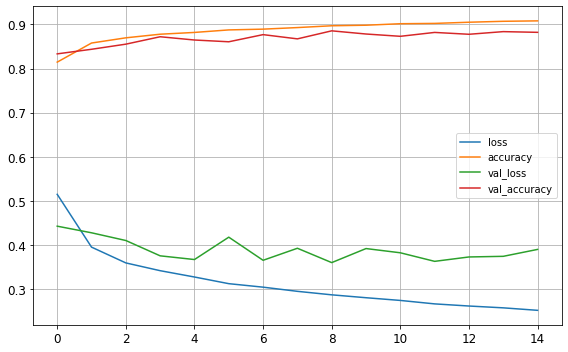

In [36]:
# SOLUTION
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid),
                    callbacks = [val_train_ratio_cb])
#model.summary()
graph_training(history,"09.rmsprop")

Epoch 1/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6314 - accuracy: 0.7844 - val_loss: 0.4329 - val_accuracy: 0.8356
(Loss)val/train: 0.85
Epoch 2/15
1719/1719 [==============================] - 2s 977us/step - loss: 0.4042 - accuracy: 0.8565 - val_loss: 0.3850 - val_accuracy: 0.8574
(Loss)val/train: 0.98
Epoch 3/15
1719/1719 [==============================] - 2s 995us/step - loss: 0.3629 - accuracy: 0.8699 - val_loss: 0.3642 - val_accuracy: 0.8706
(Loss)val/train: 1.02
Epoch 4/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3335 - accuracy: 0.8802 - val_loss: 0.3387 - val_accuracy: 0.8760
(Loss)val/train: 1.01
Epoch 5/15
1719/1719 [==============================] - 2s 993us/step - loss: 0.3177 - accuracy: 0.8837 - val_loss: 0.3285 - val_accuracy: 0.8760
(Loss)val/train: 1.04
Epoch 6/15
1719/1719 [==============================] - 2s 983us/step - loss: 0.3075 - accuracy: 0.8874 - val_loss: 0.3289 - val_accuracy: 0.8800
(Loss)val/train: 1

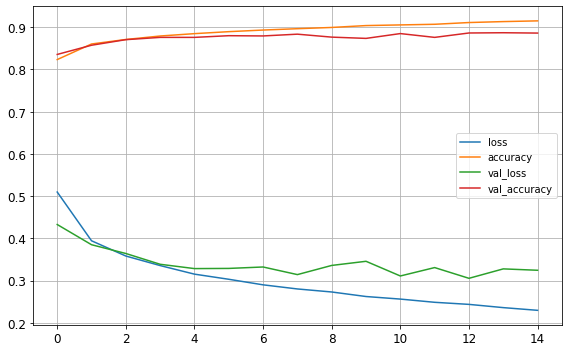

In [37]:
# SOLUTION
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid),
                    callbacks = [val_train_ratio_cb])
graph_training(history,"10.adamax")

In [38]:
model.save("mi_dnn_handson02.h5")

# 3. Test

In [39]:
# PRIVATE
model = keras.models.load_model("mi_dnn_handson02.h5")

In [40]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Loss y accuracy

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 735us/step - loss: 0.3431 - accuracy: 0.8820


[0.34306854009628296, 0.8820000290870667]

### Matriz de confusión

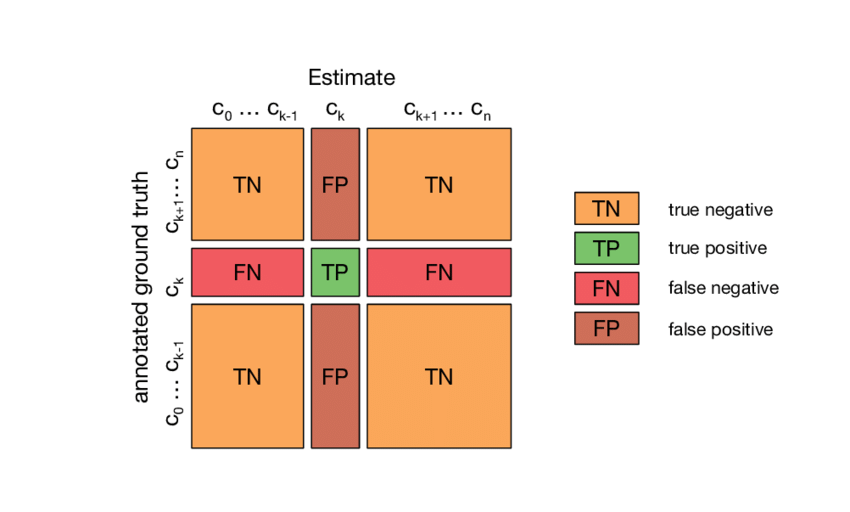

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
y_true = y_test
y_pred = np.argmax(model.predict(X_test),axis=-1)

In [44]:
print(y_true)
print(y_pred)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [45]:
confnorm = confusion_matrix(y_true, y_pred,normalize='true')

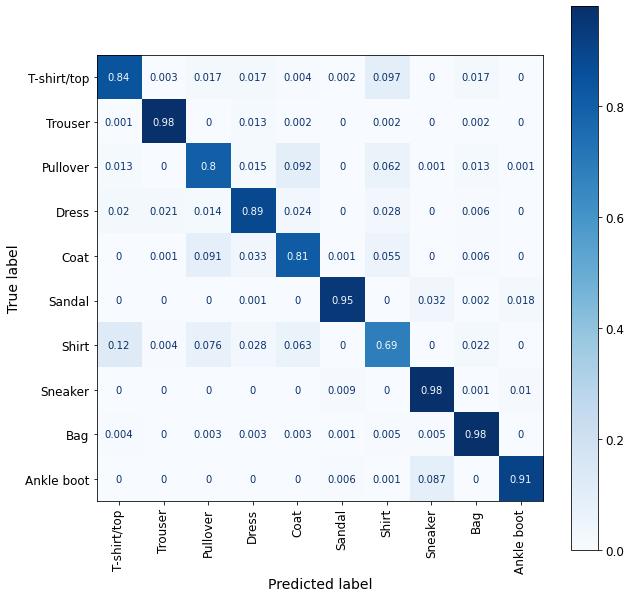

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=confnorm,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- En la matriz de confusión las clases verdaderas se indican a la izquierda y las clases predichas en la parte superior. 
- Mirando la diagonal de la matriz de confusión normalizada:
 - Indica cuál ha sido la clase que mejor se ha predicho y el porcentaje de muestras correctamente clasificadas.
 - Indica cuál ha sido la clase que peor se ha predicho y el porcentaje de muestras correctamente clasificadas.


In [47]:
# SOLUTION
# En mi caso la mejor ha sido Sneaker con un 98% de muestras correctamente clasificadas
# La peor ha sido Shirt con un 74%

In [48]:
conf = confusion_matrix(y_true, y_pred)

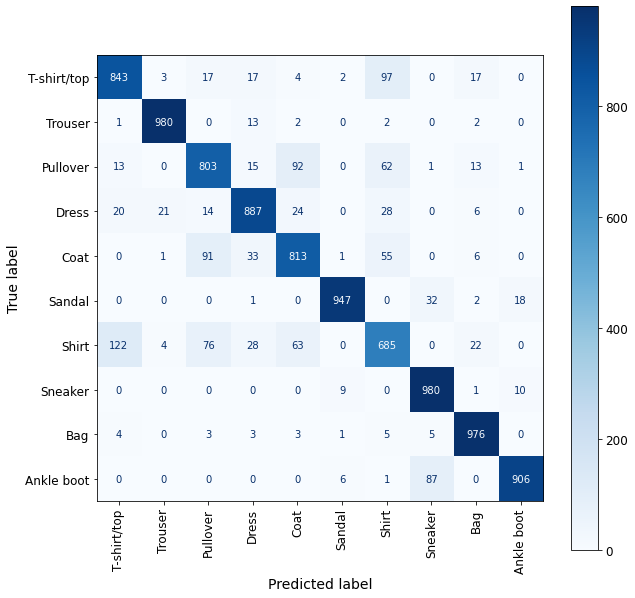

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- En la matriz de confusión las clases verdaderas se indican a la izquierda y las clases predichas en la parte superior. 
- Mirando la matriz de confusión sin normalizar, responde:
 - True Positives (TP): ¿Cuántas muestras de test se han clasificado correctamente para la clase que mejor se ha predicho y cuántas para la clase que peor se ha predicho?
 - False Negatives (FN): Para las muestras que pertenecen a la clase peor predicha, ¿con qué otras clases se han clasificado erróneamente?. Tendrás que buscar en una de las filas de la matriz.
 - False Positives (FP): ¿Las muestras de qué otras clases se han clasificado erroneamente como pertenecientes a dicha clase?. Tendrás que buscar en una de las columnas de la matriz.

In [1]:
# SOLUTION

# True positives (TP)
# Clase con mayor TP: Sneaker con 980
# Clase con menor TP: Shirt con 685

# False negatives (FN) para Shirt
# 122 predicciones erróneas como  T-shirt/Top, 4 como Trouser, 76 como Pullover, 28 como Dress, 63 como Coat, 22 como Bag

# False positives (FP) para Shirt
# 97 muestras clasificadas erróneamente como de T-shirt/Top, 2 como Trouser, 62 como Pullover, 28 como Dress, 55 como Coat, 5 Bag, 1 Ankle Bot clasificadas como Shirt

